In [ ]:

# The aim this project is to test and find the best algorithm for the ad click prediction dataset. This is an classification problem 
# different algorithms will be tested and evaluated to find the best on. Clustering will also be implemented to create customer segmentention 
# groups. 
#The dataset is available at https://www.kaggle.com/datasets/natchananprabhong/online-ad-click-prediction-dataset?select=adsclicking.csv

In [1]:
import pandas as pd


import numpy as np

df = pd.read_csv(r"C:\Users\ioust\Desktop\ml\adsclicking.csv")

In [2]:
#The column was dropped beacuse it is a simple index and not an attribute.

df= df.drop(columns=['Unnamed: 0'])


In [3]:
# The dataset has 2000 instances and 9 attributes the last one is the class.

df.shape

(2000, 9)

In [4]:
#We have 4 catecorical atrributes (Gender, Location,Device,Interest category). The rest are numeric attributes and the target/class (click)
# that is also numeric.

df.dtypes

Age                         int64
Gender                     object
Income                      int64
Location                   object
Device                     object
Interest_Category          object
Time_Spent_on_Site        float64
Number_of_Pages_Viewed      int64
Click                       int64
dtype: object

In [251]:
# In this dataset there is no null values.
df.isnull()

,Age,Gender,Income,Location,Device,Interest_Category,Time_Spent_on_Site,Number_of_Pages_Viewed,Click
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False


In [7]:
#From the descriptive statistics we see that the min age is 18 and max 64 years old.The min income is 20112 and the max 99943.
#  The min time spend in site is 5 minutes and the max 119 minutes.The min pages on the site viewed is 1 and the max 19. 

df.describe()

,Age,Income,Time_Spent_on_Site,Number_of_Pages_Viewed,Click
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.31650,59652.978500,61.113314,10.321500,0.497000
std,13.46566,23070.443915,32.518823,5.476507,0.500116
min,18.00000,20112.000000,5.006075,1.000000,0.000000
25%,30.00000,39873.750000,33.947635,6.000000,0.000000
50%,42.00000,59050.500000,60.378894,10.000000,0.000000
75%,53.00000,79547.000000,88.321464,15.000000,1.000000
max,64.00000,99943.000000,119.840992,19.000000,1.000000


In [8]:
# The target attribute is balanced 1006 peple do not click on the advertisement and 994 people click on the advertisement.

df.groupby('Click').size()

Click
0    1006
1     994
dtype: int64

In [9]:
# The gender is also balanced 1014 female and 986 male.

df.groupby('Gender').size()

Gender
Female    1014
Male       986
dtype: int64

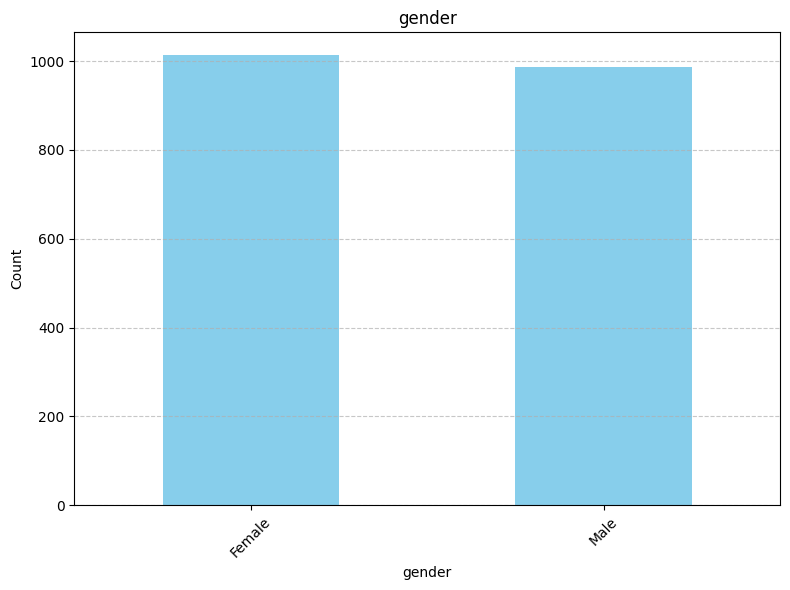

In [6]:
import matplotlib.pyplot as plt
grouped_data = df.groupby('Gender').size()

df.groupby('Gender').size()
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()



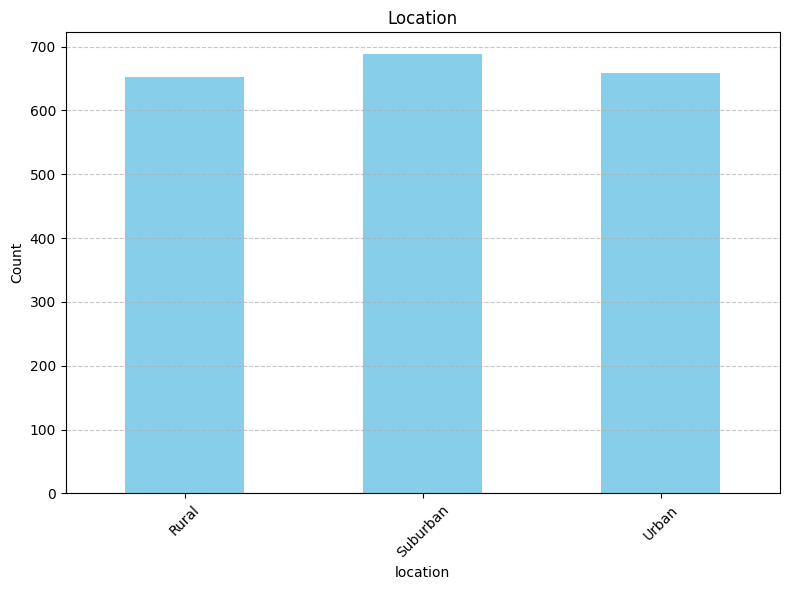

In [10]:
#This diagram shows the 3 types of location, the most instances are in the Suburban. We can say that the data is balanced.

import matplotlib.pyplot as plt
grouped_data = df.groupby('Location').size()

df.groupby('Gender').size()
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Location')
plt.xlabel('location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

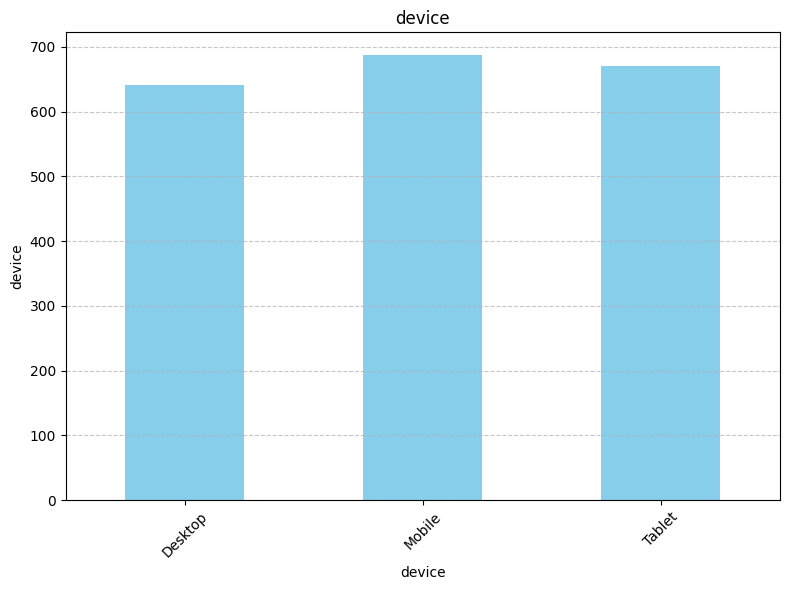

In [13]:
#This diagram show the most instances belong to the category mobile. Again the data in this attribute is balanced.

import matplotlib.pyplot as plt
grouped_data = df.groupby('Device').size()

df.groupby('Device').size()
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('device')
plt.xlabel('device')
plt.ylabel('device')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

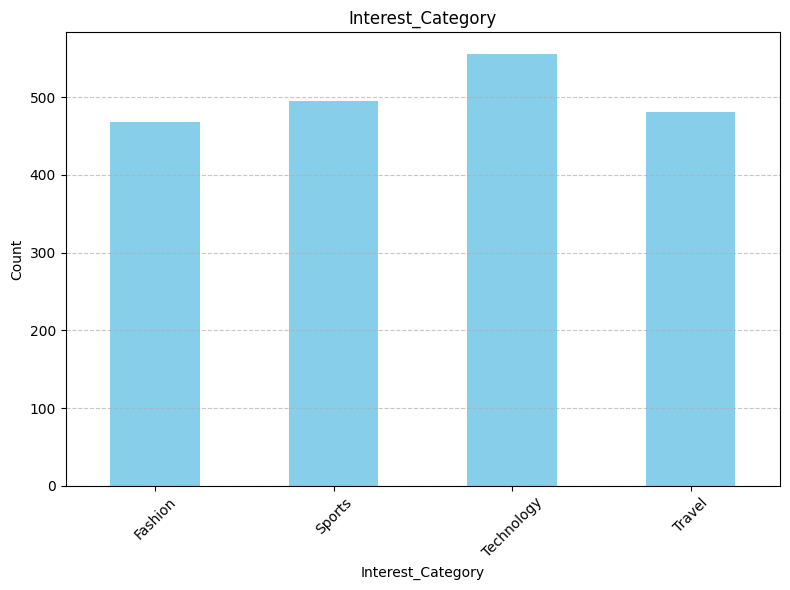

In [14]:
#This diagram shows that the interest category with the  most instances is technology but overall the data can be characterized as balanced.

import matplotlib.pyplot as plt
grouped_data = df.groupby('Interest_Category').size()

df.groupby('Interest_Category').size()
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Interest_Category')
plt.xlabel('Interest_Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

<Axes: >

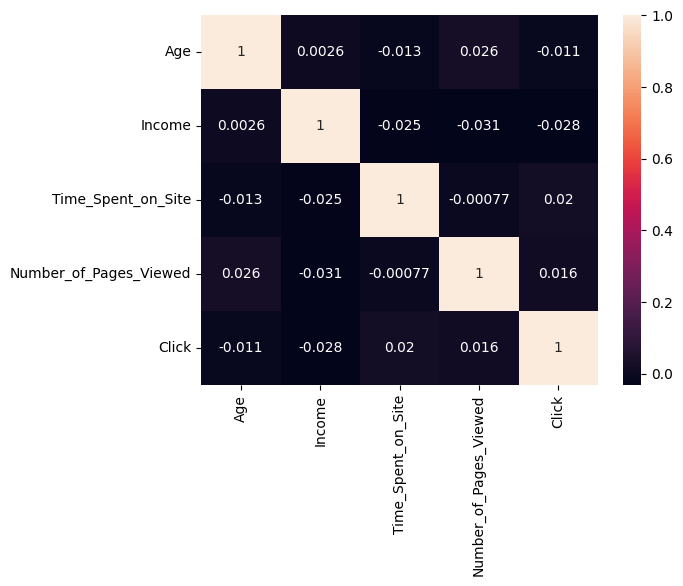

In [11]:
# From the correlation matrix it is noticable that there is no correlation between attributes as a result no attributes should be deleted.
# The correlation matrix in not performed on the encoded categorical attributes , it is logical that they will have high correlation 
# because of the 0, 1 encoding which means for example if somebody is interested in sport(1 ) in the rest categories he will not be interested(0) but 
# these 4 categories will have high correlation between them.


import seaborn as sns
df_corr = df[['Age','Income','Time_Spent_on_Site','Number_of_Pages_Viewed','Click']].corr()
sns.heatmap(df_corr, annot=True)

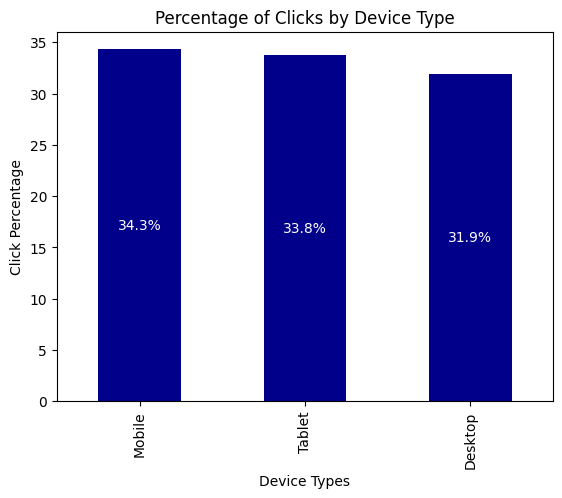

In [7]:
#This diagram shows the percentage of clicks per divice type. The highest percenage of click is 34%  from the device mobile


click_counts = df[df['Click'] == 1]['Device'].value_counts(normalize=True) * 100
ax = click_counts.plot(kind='bar', color='darkblue')
plt.xlabel('Device Types')
plt.ylabel('Click Percentage')
plt.title('Percentage of Clicks by Device Type')

for i in range(len(click_counts)):
    percentage = click_counts.iloc[i]
    ax.text(i, percentage / 2, f'{percentage:.1f}%', 
            ha='center', va='center', color='white', fontsize=10)

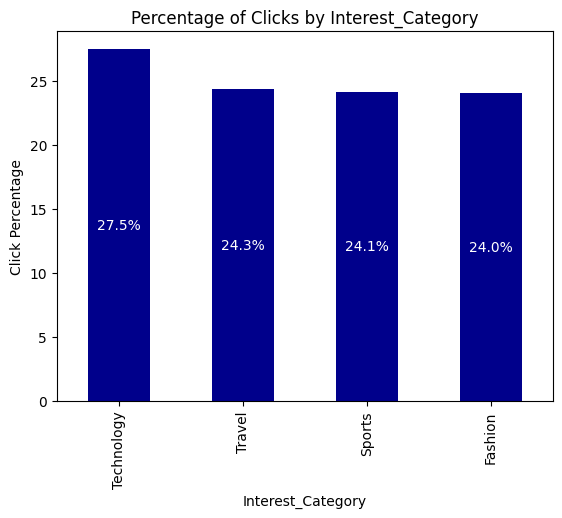

In [13]:
#This diagram shows the percentage of clicks per interest category. The highest percenage of click is 27%  from the people with interest in technology

click_counts = df[df['Click'] == 1]['Interest_Category'].value_counts(normalize=True) * 100
ax = click_counts.plot(kind='bar', color='darkblue')
plt.xlabel('Interest_Category')
plt.ylabel('Click Percentage')
plt.title('Percentage of Clicks by Interest_Category')

for i in range(len(click_counts)):
    percentage = click_counts.iloc[i]
    ax.text(i, percentage / 2, f'{percentage:.1f}%', 
            ha='center', va='center', color='white', fontsize=10)

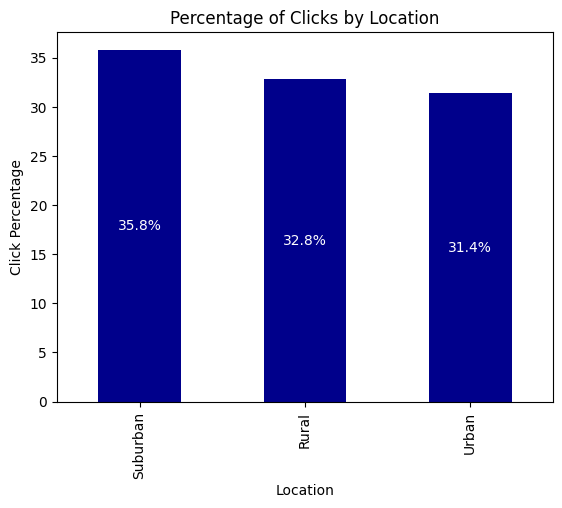

In [24]:
#This diagram shows the percentage of clicks per location. The highest percenage of click is 35%  from the people who live in the suburban.  



click_counts = df[df['Click'] == 1]['Location'].value_counts(normalize=True) * 100
ax = click_counts.plot(kind='bar', color='darkblue')
plt.xlabel('Location')
plt.ylabel('Click Percentage')
plt.title('Percentage of Clicks by Location')

for i in range(len(click_counts)):
    percentage = click_counts.iloc[i]
    ax.text(i, percentage / 2, f'{percentage:.1f}%', 
            ha='center', va='center', color='white', fontsize=10)

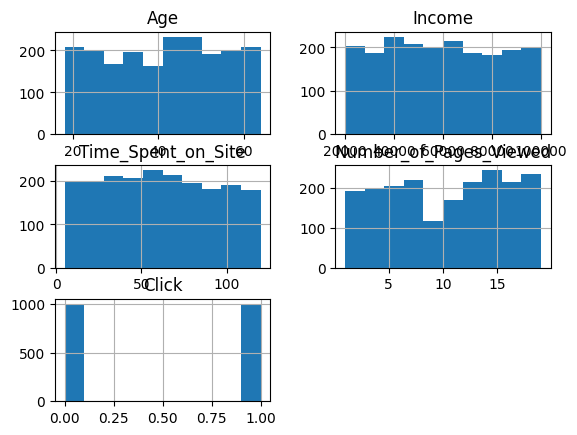

In [14]:
# From the histograms we see that in the numeric attributes the distribution is uniform.
import matplotlib as plt
h = df.hist()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <

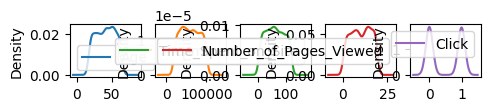

In [26]:
# Again form the density plots we can see that we have uniform distribution


df.plot(kind='density', subplots=True, layout=(6,6), sharex=False)

In [8]:
# I split my data to train and test so the test is hidden from the cross validation , to keep the purity of the test data. 

from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
# To be able to perform classification algorithms for the 4 categorical attributes encoding will be performed. The attributes will be encoded as 0 
# or 1.As a result a dataset with 17 attributes is obtained.


columns_to_encode = ['Gender', 'Location', 'Device', 'Interest_Category']


en_df = pd.get_dummies(train_data, columns=columns_to_encode,dtype=int)

In [10]:
# The target variable is moved to the last position in the dataframe. 


column_to_move = 'Click'
en_df= en_df[[col for col in en_df if col != column_to_move] + [column_to_move]]

In [11]:
# To understand which  algorithm is the best the cross validation score will be used to see which algorithm has the best performance.
# Ten splits will be implemented which means that cross validation score will cut the dataset in 10 parts and will use the 9 for train and the 10th part for
# test.This actions will be repeated 10 times. And in the end the performance score is the 10 accuracies divided by 10.

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = en_df.values
X = array[:,0:16]
Y = array[:,16]
kfold = KFold(n_splits=10,shuffle=True, random_state=7)

In [12]:
#The logistic regression is suitable for binary classification problems class 0 or class 1. Despite this the score is not good.


from sklearn.linear_model import LogisticRegression
results = cross_val_score(LogisticRegression(solver='liblinear'), X, Y, cv=kfold)
print(results.mean()) 

0.47750000000000004


In [257]:
# KNN also o good algorithm for classification, for every instnace he sees his nearest neighbors then the neighbors vote and the
# instance gets the class with the most votes. 


from sklearn.neighbors import KNeighborsClassifier
results = cross_val_score(KNeighborsClassifier(), X, Y, cv=kfold)
print(results.mean())

0.5168750000000001


In [258]:
# A suitable algorithm for classifiaction but the score 0.49 is not satisfying.

from sklearn.tree import DecisionTreeClassifier
results = cross_val_score(DecisionTreeClassifier(), X, Y, cv=kfold)
print(results.mean())

0.49000000000000005


In [259]:
# Naive bayes also a good algorithm for classification assumes that each feature is independent.
# Gaussian naive bayes is good for numericala data. The score is not good 0.47

from sklearn.naive_bayes import GaussianNB
results = cross_val_score(GaussianNB(), X, Y, cv=kfold)
print(results.mean())

0.47375


In [260]:
# SVM  another excellent algorithm for classification. His goal is to fing the best huperplane(divider) because it correctly classifies the training data

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm_model = SVC() 
results = cross_val_score(svm_model, X, Y, cv=kfold) 
print(results.mean())

0.48375


In [261]:
# Another sitable alforithm for classification is Random Trees . Random trees are created based on random subset of feaures to slit on and on randon instanses
# As result the class is based on the average prediction.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


rf_model = RandomForestClassifier(random_state=7)  
results = cross_val_score(rf_model, X, Y, cv=kfold)  
print(results.mean())

0.48999999999999994


In [262]:
# XGBoost is based on parallel creation of trees. XGBoost bustes tree ensembles, the tree ensemble model is a set 
# of classification and regression trees.

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7)


results = cross_val_score(xgb, X, Y, cv=kfold, scoring='accuracy')


print("Mean Cross-Validation Accuracy:", results.mean())

c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Li

Mean Cross-Validation Accuracy: 0.49312500000000004


In [13]:
# Min max scaler scales the data to a fixed range, typically between 0 and 1. It is good when the data doesn't follow a Gaussian distribution 
# just like in our case. 
from sklearn.preprocessing import MinMaxScaler
array = en_df.values

X = array[:,0:16]
Y = array[:,16]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

kfold = KFold(n_splits=10, shuffle=True, random_state=7)

In [264]:
#Logistic regression has the same score 0.47

from sklearn.linear_model import LogisticRegression
results = cross_val_score(LogisticRegression(solver='liblinear'), rescaledX, Y, cv=kfold)
print(results.mean()) 

0.478125


In [265]:
# Since we had normal distribution that means that the values are already evenly spread in the space. After the min max scaler 
# since KNN measures distances some attribute may had lost its informative nature and KNN lost its efectiveness. The score worsend from
# 0.51 to 0.49

from sklearn.neighbors import KNeighborsClassifier
results = cross_val_score(KNeighborsClassifier(), rescaledX, Y, cv=kfold)
print(results.mean())

0.491875


In [266]:
# The dicision trees dont normaly need any data trasformation so the score is close to score from  the original dataset.

from sklearn.tree import DecisionTreeClassifier
results = cross_val_score(DecisionTreeClassifier(), rescaledX, Y, cv=kfold)
print(results.mean())

0.478125


In [267]:
# Naive bayes has the same perfomance


from sklearn.naive_bayes import GaussianNB
results = cross_val_score(GaussianNB(), rescaledX, Y, cv=kfold)
print(results.mean())

0.4875


In [268]:
# SVM improved his performance , the scaled data helped to find the hyperplane easier. Now there is no need for difficult computations.

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm_model = SVC() 
results = cross_val_score(svm_model, rescaledX, Y, cv=kfold) 
print(results.mean())

0.5018750000000001


In [269]:
# Random forest has the same perfomance


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


rf_model = RandomForestClassifier(random_state=7)  
results = cross_val_score(rf_model, rescaledX, Y, cv=kfold)  
print(results.mean())

0.4887499999999999


In [270]:
# XGBOOST has the same performance.

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7)


results = cross_val_score(xgb, rescaledX, Y, cv=kfold, scoring='accuracy')

print("Mean Cross-Validation Accuracy:", results.mean())

c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Li

Mean Cross-Validation Accuracy: 0.49312500000000004


c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [14]:
# Now standart scaler will be performed. It  scales the data to have a mean of 0 and a standard deviation of 1
# Suitable for algorithms that assume standard normally distributed data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
resX = scaler.transform(X)

In [272]:
#Logistic regression has the same performance
from sklearn.linear_model import LogisticRegression
results = cross_val_score(LogisticRegression(solver='liblinear'), resX, Y, cv=kfold)
print(results.mean()) 

0.47875000000000006


In [273]:
# KNN was worsened beacause many attributes may have lost their relationships that had a meaning for example age and salary. This may 
# had been meaningfull in the uniform distribution

from sklearn.neighbors import KNeighborsClassifier
results = cross_val_score(KNeighborsClassifier(), resX, Y, cv=kfold)
print(results.mean())

0.484375


In [274]:
# The trees work fine without standarization.

from sklearn.tree import DecisionTreeClassifier
results = cross_val_score(DecisionTreeClassifier(), resX, Y, cv=kfold)
print(results.mean())

0.479375


In [275]:
# Standarization is useful when we have gaussian distribution . In our case it was not useful and helpful for naive bayes that need gaussian distribution

from sklearn.naive_bayes import GaussianNB
results = cross_val_score(GaussianNB(), resX, Y, cv=kfold)
print(results.mean())

0.4875


In [276]:
#  SVM has the same performance.

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm_model = SVC() 
results = cross_val_score(svm_model, resX, Y, cv=kfold) 
print(results.mean())

0.489375


In [277]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


rf_model = RandomForestClassifier(random_state=7)  
results = cross_val_score(rf_model, resX, Y, cv=kfold)  
print(results.mean())

0.49000000000000005


In [278]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7)

results = cross_val_score(xgb, resX, Y, cv=kfold, scoring='accuracy')


print("Mean Cross-Validation Accuracy:", results.mean())

c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Li

Mean Cross-Validation Accuracy: 0.49312500000000004


c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
# Normalization scales the data at the row level so that the norm of each data point (row) is 1.It ensures that each data point contributes equally


from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

In [280]:


from sklearn.linear_model import LogisticRegression
results = cross_val_score(LogisticRegression(solver='liblinear'), normalizedX, Y, cv=kfold)
print(results.mean()) 

0.49250000000000005


In [281]:
#Uniform distributions may already provide meaningful separability for KNN and now it worsened after the normalization.


from sklearn.neighbors import KNeighborsClassifier
results = cross_val_score(KNeighborsClassifier(), normalizedX, Y, cv=kfold)
print(results.mean())

0.488125


In [282]:
from sklearn.tree import DecisionTreeClassifier
results = cross_val_score(DecisionTreeClassifier(), normalizedX, Y, cv=kfold)
print(results.mean())

0.48250000000000004


In [283]:
#Normalization  make the feature distributions closer to what the NB wants meaning gaussian ditribution

from sklearn.naive_bayes import GaussianNB
results = cross_val_score(GaussianNB(), normalizedX, Y, cv=kfold)
print(results.mean())

0.48875


In [284]:
#Normalization  compresses the range of feature values so it affected a little the algorithm.

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm_model = SVC() 
results = cross_val_score(svm_model, normalizedX, Y, cv=kfold) 
print(results.mean())

0.49250000000000005


In [285]:
# Random forest and GXBOOST probably after normalization had the oportunity to find attributes with more ease to perform more meaningfull splits.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


rf_model = RandomForestClassifier(random_state=7)  
results = cross_val_score(rf_model, normalizedX, Y, cv=kfold)  
print(results.mean())

0.505625


In [286]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7)

results = cross_val_score(xgb, normalizedX, Y, cv=kfold, scoring='accuracy')


print("Mean Cross-Validation Accuracy:", results.mean())

c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:14:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:14:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:14:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Li

Mean Cross-Validation Accuracy: 0.504375


c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:14:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:14:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [16]:
X_train = en_df.drop('Click', axis=1)
y_train = en_df['Click']


In [17]:
# Now i will tune the KNN algorithm to find the best K , the best weights and the best metric. As a result the Best K is 3, metric euclidean distance
# and weights distance.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV




knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
     'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=7, scoring='accuracy')

grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)




Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.5175247069639164


In [18]:
columns_to_encode = ['Gender', 'Location', 'Device', 'Interest_Category']


en_dftest = pd.get_dummies(test_data, columns=columns_to_encode,dtype=int)

In [19]:
column_to_move = 'Click'
en_dftest= en_dftest[[col for col in en_dftest if col != column_to_move] + [column_to_move]]

In [20]:
# As a result the best algorithm is KNN. Now i will use the  20% of data tha was stored as  test. The k will be 3 
# metric euclidean and weights distance.Accuracy 0.53 means that 118 correct in class 0 and 94 correct in the class 1 divided by 400.
# Precision for class 0 of all instances the model predicted as class 0, 52% were actually correct.
# Recall For class 0 of all the actual class 0 instances, the model correctly identified 60% of them.
# F1 score a harmonic mean between the presicion and recall.
# Precision for class 1 of all instances the model predicted as class 1, 54% were actually correct.
# Recall for class 1 of all the actual class 1 instances, the model correctly identified 47% of them.
# The score is not so satisfying as a result more data need to be collected.The algorithm can not make clear seperation of when a class is 0 and when 1 
# thats why more data is needed.Spesifically the creator of the dataset whould had been asked to provide more attributes because the algorithm underfits.
# As the domain expert and the owner of the dataset he may have more information (attributes) that can provide significant improvement to the algorithm.



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
X_test = en_dftest.drop('Click', axis=1)
y_test = en_dftest['Click']
k = 3  
model = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.60      0.56       198
           1       0.54      0.47      0.50       202

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



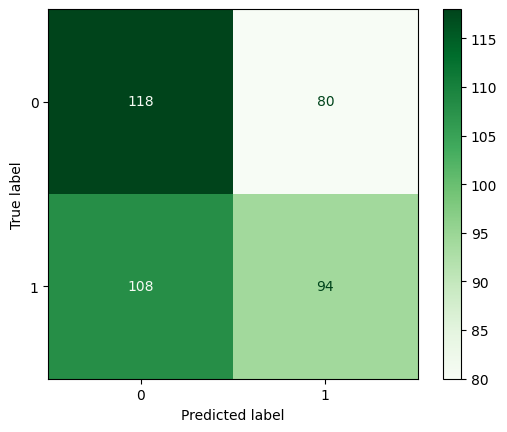

In [ ]:
# The confusion matrix shows that from the 210 instances in class 0 , 118 were corect predicted in class 0 and 80 wrongly predicted in class 1.
# From all the instances in class 1 , 94 were correctly predicted and the 108 were misclassified as class 0.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
disp.plot(cmap='Greens')  

In [22]:
X_train = normalizedX
y_train = en_df['Click']

In [23]:
#Last but not least XGBoost will be tunned to see if the performace can be improved. As a result indeed the score is 0.523 but
# it is lower than KNN.

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report




xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7)


param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [3, 5, 7],          
    'learning_rate': [0.1, 0.01, 0.001],  
    'subsample': [0.8, 1.0],         
    'colsample_bytree': [0.8, 1.0]   
}


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=7, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)




Fitting 7 folds for each of 108 candidates, totalling 756 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.5231528603167307


c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [24]:
X_test = en_dftest.drop('Click', axis=1)
y_test = en_dftest['Click']

In [25]:
# Even though KNN was chosen as victorious algorithm just out of interest XGBOOSt will also be trained and tested. It has even lower accuracy than KNN.

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report





model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=7,
    colsample_bytree=1,   
    learning_rate=0.1,     
    max_depth=5,            
    n_estimators=100,       
    subsample=1       
)




model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.77      0.60       198
           1       0.49      0.22      0.30       202

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.45       400
weighted avg       0.49      0.49      0.45       400



c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [26]:
columns_to_encode = ['Gender', 'Location', 'Device', 'Interest_Category']


en_df = pd.get_dummies(train_data, columns=columns_to_encode,dtype=int)

In [27]:
column_to_move = 'Click'
en_df= en_df[[col for col in en_df if col != column_to_move] + [column_to_move]]

In [28]:
# The original dataset is copied.
en_copy = en_df.copy()


In [29]:
#I will try to binnarize the age and income to see if feature engineering  can help improve tha accuracy of the models

bins_age = [18, 35, 50, 65]  
labels_age = ["Young", "Middle-Aged", "Senior"]

en_copy["Age_Group"] = pd.cut(en_copy["Age"], bins=bins_age, labels=labels_age, include_lowest=True)

In [30]:
bins_income = [en_copy["Income"].min(), 40000, 70000, en_copy["Income"].max()]
labels_income = ["Low", "Medium", "High"]
en_copy["Income_Group"] = pd.cut(en_copy["Income"], bins=bins_income, labels=labels_income, include_lowest=True)

In [31]:
columns_to_encode = ['Age_Group', 'Income_Group']


en_copy = pd.get_dummies(en_copy, columns=columns_to_encode,dtype=int)

In [32]:
column_to_move = 'Click'
en_copy= en_copy[[col for col in en_copy if col != column_to_move] + [column_to_move]]

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = en_copy.values
A = array[:,0:22]
B = array[:,22]
kfold = KFold(n_splits=10,shuffle=True, random_state=7)

In [34]:
from sklearn.linear_model import LogisticRegression
results = cross_val_score(LogisticRegression(solver='liblinear'), A, B, cv=kfold)
print(results.mean()) 

0.48


In [35]:

from sklearn.neighbors import KNeighborsClassifier
results = cross_val_score(KNeighborsClassifier(), A, B, cv=kfold)
print(results.mean())

0.5168750000000001


In [36]:
from sklearn.naive_bayes import GaussianNB
results = cross_val_score(GaussianNB(), A, B, cv=kfold)
print(results.mean())

0.48125


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


rf_model = RandomForestClassifier(random_state=7)  
results = cross_val_score(rf_model, A, B, cv=kfold)  
print(results.mean())

0.49874999999999997


In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7)

results = cross_val_score(xgb, A, B, cv=kfold, scoring='accuracy')


print("Mean Cross-Validation Accuracy:", results.mean())

c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Li

Mean Cross-Validation Accuracy: 0.49624999999999997


c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ioust\Desktop\ml\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [39]:

from sklearn.tree import DecisionTreeClassifier
results = cross_val_score(DecisionTreeClassifier(), A, B, cv=kfold)
print(results.mean())

0.488125


In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm_model = SVC() 
results = cross_val_score(svm_model, A, B, cv=kfold) 
print(results.mean())

0.48250000000000004


In [311]:
# As a result we see that even feature engineering is not heplful. More attributes are needed for the model to understand how to seperate the classes.
# If the  domain expert (the one that created the dataset) could have provided more features the algorithms may have better chances to improve. For example 
# an attribute such  the time of the day a user entered the site could maybe improve the algorithms.

In [312]:
columns_to_encode = ['Gender', 'Location', 'Device', 'Interest_Category']


en_df = pd.get_dummies(df, columns=columns_to_encode,dtype=int)

In [313]:
column_to_move = 'Click'
en_df= en_df[[col for col in en_df if col != column_to_move] + [column_to_move]]

In [314]:
# Now we will procced with clustering. Its going to be performed to understand better the customer seggmrntation.I want to understand what spesific 
# group of people will click or not click on an add.Its unsupervised learning so no label will be used, i will treat the attribute Click as an ordinary attribute and there is no train and test dividing.
# I have to make it clear that i dont want ot predict the click , want to see possible customer segmentation.
#  This type of data i believe is very good and infromative to perform clustering. We can easily understnd the caracteristics of each customer group.
# K means will be implemneted and tested with sillhoutte score and davies bouldin to find the best number of clusters.
#  K mean sets the means at first time randomly and calculates the distance of the datapionts to each of the  means. After the clusters are formed new means
# are calculated and again we need  to categorize the datapoints. The procedure stops when the means dont change any more.
# Silhouette is comparison between average in-cluster distance and average distance to other clusters. The closer it is to 1 the better number of 
# clusters choosen. It measures how well each data point fits within its assigned cluster and how well-separated it is from other clusters.
# The best number of clusters (K) is: 2  Silhouette Score for K=2: 0.6294 a pretty satisfying score.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k_range = range(2, 10)  

sil_scores = []
best_k = None
best_score = -1


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(en_df)  
    score = silhouette_score(en_df, kmeans.labels_)
    sil_scores.append(score)
    
    
    if score > best_score:
        best_score = score
        best_k = k


print(f"The best number of clusters (K) is: {best_k}")
print(f"Silhouette Score for K={best_k}: {best_score:.4f}")

The best number of clusters (K) is: 2
Silhouette Score for K=2: 0.6294


In [317]:
# Davies Bouldin score  is defined as the average similarity measure of each cluster with its most similar cluster, 
# where similarity is the ratio of within-cluster distances to between-cluster distances. 
# Thus, clusters which are farther apart and less dispersed will result in a better score. 
# The minimum score is zero, with lower values indicating better clustering.
# The best number of clusters (K) based on Davies-Bouldin Score is: 9 Davies-Bouldin Score for K=9: 0.4900  a satisfying score .
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


k_range = range(2, 10)  

db_scores = []
best_k_db = None
best_db_score = float('inf')  


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(en_df)  
    
     
    db_score = davies_bouldin_score(en_df, kmeans.labels_)
    db_scores.append(db_score)
    
    
    if db_score < best_db_score:
        best_db_score = db_score
        best_k_db = k


print(f"The best number of clusters (K) based on Davies-Bouldin Score is: {best_k_db}")
print(f"Davies-Bouldin Score for K={best_k_db}: {best_db_score:.4f}")

The best number of clusters (K) based on Davies-Bouldin Score is: 9
Davies-Bouldin Score for K=9: 0.4900


In [316]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(en_df)


In [318]:
# Min max scaler will be perforemd to see if maybe the results can be improved since the K means measures the distance between the datapoints
#  Davies-Bouldin Score for K=4: 1.9621 worsened.

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


k_range = range(2, 10)  

db_scores = []
best_k_db = None
best_db_score = float('inf')  


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(rescaledX)  
    
    
    db_score = davies_bouldin_score(rescaledX, kmeans.labels_)
    db_scores.append(db_score)
    
    
    if db_score < best_db_score:
        best_db_score = db_score
        best_k_db = k


print(f"The best number of clusters (K) based on Davies-Bouldin Score is: {best_k_db}")
print(f"Davies-Bouldin Score for K={best_k_db}: {best_db_score:.4f}")

The best number of clusters (K) based on Davies-Bouldin Score is: 4
Davies-Bouldin Score for K=4: 1.9621


In [319]:
#Silhouette Score for K=7: 0.1640 worsened.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k_range = range(2, 11)  

sil_scores = []
best_k = None
best_score = -1


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(rescaledX)  
    score = silhouette_score(rescaledX, kmeans.labels_)
    sil_scores.append(score)
    
   
    if score > best_score:
        best_score = score
        best_k = k


print(f"The best number of clusters (K) is: {best_k}")
print(f"Silhouette Score for K={best_k}: {best_score:.4f}")

The best number of clusters (K) is: 7
Silhouette Score for K=7: 0.1640


In [320]:
#Standart scaler will aslo be perforemd to see if we can impove clustering.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(en_df)
resX = scaler.transform(en_df)

In [321]:
#Silhouette Score for K=9: 0.133  worsened

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k_range = range(2, 11)  

sil_scores = []
best_k = None
best_score = -1


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(resX)  
    score = silhouette_score(resX, kmeans.labels_)
    sil_scores.append(score)
    
    
    if score > best_score:
        best_score = score
        best_k = k


print(f"The best number of clusters (K) is: {best_k}")
print(f"Silhouette Score for K={best_k}: {best_score:.4f}")

The best number of clusters (K) is: 9
Silhouette Score for K=9: 0.1333


In [322]:
# Davies-Bouldin Score for K=9: 2.1522 very bad score the DBI should be close to 0.


from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


k_range = range(2, 10)  

db_scores = []
best_k_db = None
best_db_score = float('inf')  


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(resX)  
    
  
    db_score = davies_bouldin_score(resX, kmeans.labels_)
    db_scores.append(db_score)
    
    
    if db_score < best_db_score:
        best_db_score = db_score
        best_k_db = k


print(f"The best number of clusters (K) based on Davies-Bouldin Score is: {best_k_db}")
print(f"Davies-Bouldin Score for K={best_k_db}: {best_db_score:.4f}")


The best number of clusters (K) based on Davies-Bouldin Score is: 9
Davies-Bouldin Score for K=9: 2.1522


In [323]:

from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(en_df)
normalizedX = scaler.transform(en_df)

In [324]:
# Normalization will also be perforemd.
#Silhouette Score for K=2: 0.5533  and good score but not perfect.



from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k_range = range(2, 11)  

sil_scores = []
best_k = None
best_score = -1


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(normalizedX)  
    score = silhouette_score(normalizedX, kmeans.labels_)
    sil_scores.append(score)
    
    
    if score > best_score:
        best_score = score
        best_k = k


print(f"The best number of clusters (K) is: {best_k}")
print(f"Silhouette Score for K={best_k}: {best_score:.4f}")

The best number of clusters (K) is: 2
Silhouette Score for K=2: 0.5533


In [325]:
#Davies-Bouldin Score for K=2: 0.7360 a not so good score.

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


k_range = range(2, 10)

db_scores = []
best_k_db = None
best_db_score = float('inf')  


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(normalizedX)  
    
    
    db_score = davies_bouldin_score(normalizedX, kmeans.labels_)
    db_scores.append(db_score)
    
    
    if db_score < best_db_score:
        best_db_score = db_score
        best_k_db = k


print(f"The best number of clusters (K) based on Davies-Bouldin Score is: {best_k_db}")
print(f"Davies-Bouldin Score for K={best_k_db}: {best_db_score:.4f}")

The best number of clusters (K) based on Davies-Bouldin Score is: 2
Davies-Bouldin Score for K=2: 0.7360


In [326]:
# I will test both 2 clusters and 9. Even though i already suspect that the best one is 9 because it  will be more informative.

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=2, random_state=7)
kmeans.fit(en_df)  


silhouette_avg = silhouette_score(en_df, kmeans.labels_)
print(f"Silhouette Score for k=2: {silhouette_avg:.4f}")


en_df['Cluster'] = kmeans.labels_


centroids = kmeans.cluster_centers_
print("\nCluster Centroids:")
print(centroids)

Silhouette Score for k=2: 0.6294

Cluster Centroids:
[[4.12017544e+01 4.01840380e+04 6.14431745e+01 1.05263158e+01
  4.98050682e-01 5.01949318e-01 3.22612086e-01 3.54775828e-01
  3.22612086e-01 3.16764133e-01 3.40155945e-01 3.43079922e-01
  2.28070175e-01 2.53411306e-01 2.75828460e-01 2.42690058e-01
  5.14619883e-01]
 [4.14373717e+01 8.01613285e+04 6.07658431e+01 1.01057495e+01
  5.16427105e-01 4.83572895e-01 3.30595483e-01 3.32648871e-01
  3.36755647e-01 3.24435318e-01 3.48049281e-01 3.27515400e-01
  2.40246407e-01 2.41273101e-01 2.80287474e-01 2.38193018e-01
  4.78439425e-01]]


In [327]:
# As suspected the 2 clusters are not informative  for example both clusters  on average are male and the are interested in sports and in cluster
 # 0 they do not click on the advertisement but in cluster 1 they do. Sadly that is not useful, so 9 cluster will be implemented.

def descriptive_prof(en_df, cluster_id):
    profile = []
    
    for feature in en_df.columns:
        mean_value = en_df[feature][cluster_id]
        
        
        
        if mean_value > en_df[feature].mean():
                profile.append(f"{feature} is HIGH (mean: {mean_value:.2f})")
        else:
                profile.append(f"{feature} is LOW (mean: {mean_value:.2f})")
    
    return profile


descriptive_profiles = {}

for cluster_id in [0,1 ]:
    descriptive_profiles[f"Cluster {cluster_id}"] = descriptive_prof(en_df, cluster_id)



for cluster, profile in descriptive_profiles.items():
    print(f"\nProfile for {cluster}:")
    for feature_profile in profile:
        print(f"- {feature_profile}")


Profile for Cluster 0:
- Age is HIGH (mean: 56.00)
- Income is HIGH (mean: 99003.00)
- Time_Spent_on_Site is HIGH (mean: 81.98)
- Number_of_Pages_Viewed is LOW (mean: 7.00)
- Gender_Female is LOW (mean: 0.00)
- Gender_Male is HIGH (mean: 1.00)
- Location_Rural is HIGH (mean: 1.00)
- Location_Suburban is LOW (mean: 0.00)
- Location_Urban is LOW (mean: 0.00)
- Device_Desktop is LOW (mean: 0.00)
- Device_Mobile is HIGH (mean: 1.00)
- Device_Tablet is LOW (mean: 0.00)
- Interest_Category_Fashion is LOW (mean: 0.00)
- Interest_Category_Sports is HIGH (mean: 1.00)
- Interest_Category_Technology is LOW (mean: 0.00)
- Interest_Category_Travel is LOW (mean: 0.00)
- Click is LOW (mean: 0.00)
- Cluster is HIGH (mean: 1.00)

Profile for Cluster 1:
- Age is HIGH (mean: 46.00)
- Income is HIGH (mean: 72395.00)
- Time_Spent_on_Site is LOW (mean: 59.85)
- Number_of_Pages_Viewed is LOW (mean: 3.00)
- Gender_Female is LOW (mean: 0.00)
- Gender_Male is HIGH (mean: 1.00)
- Location_Rural is LOW (mean: 0.

In [328]:
columns_to_encode = ['Gender', 'Location', 'Device', 'Interest_Category']


en_df = pd.get_dummies(df, columns=columns_to_encode,dtype=int)
column_to_move = 'Click'
en_df= en_df[[col for col in en_df if col != column_to_move] + [column_to_move]]


In [329]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=9, random_state=7)
kmeans.fit(en_df)  


davies = davies_bouldin_score(en_df, kmeans.labels_)
print(f"davies Score for k=9: {davies:.4f}")


en_df['Cluster'] = kmeans.labels_


centroids = kmeans.cluster_centers_
print("\nCluster Centroids:")
print(centroids)

davies Score for k=9: 0.4900

Cluster Centroids:
[[4.16697674e+01 4.84906977e+04 6.34484830e+01 1.04325581e+01
  4.93023256e-01 5.06976744e-01 3.25581395e-01 3.39534884e-01
  3.34883721e-01 3.67441860e-01 3.34883721e-01 2.97674419e-01
  2.37209302e-01 2.13953488e-01 2.83720930e-01 2.65116279e-01
  4.74418605e-01]
 [4.05350877e+01 7.56891491e+04 6.55567679e+01 1.00131579e+01
  5.48245614e-01 4.51754386e-01 3.50877193e-01 3.28947368e-01
  3.20175439e-01 3.42105263e-01 3.20175439e-01 3.37719298e-01
  2.54385965e-01 2.10526316e-01 2.98245614e-01 2.36842105e-01
  4.42982456e-01]
 [4.04642857e+01 2.38337500e+04 6.16027934e+01 1.03316327e+01
  4.94897959e-01 5.05102041e-01 3.57142857e-01 3.46938776e-01
  2.95918367e-01 3.57142857e-01 3.11224490e-01 3.31632653e-01
  2.29591837e-01 2.50000000e-01 2.60204082e-01 2.60204082e-01
  4.79591837e-01]
 [4.20735931e+01 9.56408312e+04 5.83831154e+01 1.03203463e+01
  5.28138528e-01 4.71861472e-01 3.07359307e-01 3.37662338e-01
  3.54978355e-01 3.29004329e-

In [330]:
en_df.groupby('Cluster').size()

Cluster
0    215
1    230
2    196
3    232
4    245
5    211
6    232
7    196
8    243
dtype: int64

In [331]:
#Cluster 0 Average : High Age, High Income, High time spend on site, Little pages viewed, Male , Rural , Mobile , Sport     ->     NOT CLICK
#Cluster 1 Average : Medium Age, High Income, Little time spend on site, Little pages viewed, Male,Suburban , Tablet, Sport     ->     CLICK
#Cluster 2 Average : Medium Age, Medium Income, High time spend on site, Little pages viewed, Male,Suburban , Tablet, Sport ->NOT CLICK
#Cluster 3 Average :High Age, High Income, Little time spend on site, Little pages viewed, Male , Urban , Tablet , Technology ->NOT CLICK  
#Cluster 4 Average : Young Age, High Income, High time spend on site, Little pages viewed, Female,Suburban , Mobile , Fashion ->NOT CLICK 
#Cluster 5 Average : Medium Age, Low Income, High time spend on site, Little pages viewed, Female,Rural, Tablet  , Technology ->CLICK  
#Cluster 6 Average : High Age, High Income, High time spend on site, Little pages viewed, Male,Urban, Mobile  , Sports-> CLICK 
#Cluster 7 Average : Medium Age, Medium Income, Little time spend on site, Little pages viewed, Male,Rural , Mobile  , Travel ->  CLICK
#Cluster 8 Average : Medium Age, High Income, Little time spend on site, Little pages viewed, Male,Rural , Tablet  , Technology-> CLICK

#These are  significant findings we can be sure that on average high and medium age male will click on an adversisement. As 
# a result sports adverisement should be published on the site. Also man and woman with interest in technology will also click on the adverisement
# Obtaining such knowledge gives us the oportunity to contact sport betting bussinesses or technology companies  and convince them to 
# cooperate and post their advertisement on our site because on average we have customers that will click. 
# The advertisement should be designed for mobile or tablet because that the devise the customers use.
#The advertisement should be designed for customers that have age from 30 years old to approximately 60.
#Also on average the customers are from rural areas.
#This is how you extract precious knowledge for your bussiness.




def descriptive_prof(en_df, cluster_id):
    profile = []
    
    for feature in en_df.columns:
        mean_value = en_df[feature][cluster_id]
        
        
        
        if mean_value > en_df[feature].mean():
                profile.append(f"{feature} is HIGH (mean: {mean_value:.2f})")
        else:
                profile.append(f"{feature} is LOW (mean: {mean_value:.2f})")
    
    return profile


descriptive_profiles = {}

for cluster_id in [0,1,2,3,4,5,6,7,8 ]:
    descriptive_profiles[f"Cluster {cluster_id}"] = descriptive_prof(en_df, cluster_id)


for cluster, profile in descriptive_profiles.items():
    print(f"\nProfile for {cluster}:")
    for feature_profile in profile:
        print(f"- {feature_profile}")


Profile for Cluster 0:
- Age is HIGH (mean: 56.00)
- Income is HIGH (mean: 99003.00)
- Time_Spent_on_Site is HIGH (mean: 81.98)
- Number_of_Pages_Viewed is LOW (mean: 7.00)
- Gender_Female is LOW (mean: 0.00)
- Gender_Male is HIGH (mean: 1.00)
- Location_Rural is HIGH (mean: 1.00)
- Location_Suburban is LOW (mean: 0.00)
- Location_Urban is LOW (mean: 0.00)
- Device_Desktop is LOW (mean: 0.00)
- Device_Mobile is HIGH (mean: 1.00)
- Device_Tablet is LOW (mean: 0.00)
- Interest_Category_Fashion is LOW (mean: 0.00)
- Interest_Category_Sports is HIGH (mean: 1.00)
- Interest_Category_Technology is LOW (mean: 0.00)
- Interest_Category_Travel is LOW (mean: 0.00)
- Click is LOW (mean: 0.00)
- Cluster is LOW (mean: 3.00)

Profile for Cluster 1:
- Age is HIGH (mean: 46.00)
- Income is HIGH (mean: 72395.00)
- Time_Spent_on_Site is LOW (mean: 59.85)
- Number_of_Pages_Viewed is LOW (mean: 3.00)
- Gender_Female is LOW (mean: 0.00)
- Gender_Male is HIGH (mean: 1.00)
- Location_Rural is LOW (mean: 0.0